## Work
1. 請比較使用不同層數以及不同 Dropout rate 對訓練的效果
2. 將 optimizer 改成使用 Adam 並加上適當的 dropout rate 檢視結果

In [1]:
import os
import keras
import itertools
# Disable GPU
os.environ["CUDA_VISIBLE_DEVICES"] = ""

Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# Preproc the inputs
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# Preprc the outputs
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [13]:
from keras.layers import Dropout

def build_mlp(input_shape, num_neurons, drp_ratio, output_units=10):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(input_layer)
            x = Dropout(drp_ratio)(x)
        else:
            x = keras.layers.Dense(units=n_units, 
                                   activation="relu", 
                                   name="hidden_layer"+str(i+1))(x)
            x = Dropout(drp_ratio)(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [14]:
"""Code Here
設定超參數
"""
LEARNING_RATE = 1e-3
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.95
num_neurons_list = [[512, 256], [512, 256, 128], [512, 256, 128, 64]]
drp_ratio_list = [0.1, 0.2, 0.3]

In [20]:

results = {}

for num_neurons in num_neurons_list:
    for drp_ratio in drp_ratio_list:
        keras.backend.clear_session() # 把舊的 Graph 清掉
        print(f"Experiment with num_neuron: {num_neurons} and drop_ratio: {drp_ratio}")
        model = build_mlp(input_shape = x_train.shape[1:], num_neurons = num_neurons, drp_ratio = drp_ratio)
        model.summary()
        optimizer = keras.optimizers.SGD(lr=LEARNING_RATE, nesterov=True, momentum=MOMENTUM)
        model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

        model.fit(x_train, y_train, 
                  epochs=EPOCHS, 
                  batch_size=BATCH_SIZE, 
                  validation_data=(x_test, y_test), 
                  shuffle=True)

        # Collect results
        train_loss = model.history.history["loss"]
        valid_loss = model.history.history["val_loss"]
        train_acc = model.history.history["accuracy"]
        valid_acc = model.history.history["val_accuracy"]

        exp_name_tag = f"{len(num_neurons)} hidden layers drop%: {drp_ratio}"
        results[exp_name_tag] = {'train-loss': train_loss,
                                 'valid-loss': valid_loss,
                                 'train-acc': train_acc,
                                 'valid-acc': valid_acc}

Experiment with num_neuron: [512, 256] and drop_ratio: 0.1
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
dropout_2 (Dropout)          (None, 256)               0         
_________________________________________________________________
output (Dense)               (None, 10)                2570      
Total params: 1,707,274
Trainable params: 1,707,274
Non-trainable 

50000/50000 [==============================] - 20s 391us/step - loss: 1.1523 - accuracy: 0.5976 - val_loss: 1.3067 - val_accuracy: 0.5329
Epoch 48/50
50000/50000 [==============================] - 18s 362us/step - loss: 1.1437 - accuracy: 0.6006 - val_loss: 1.2995 - val_accuracy: 0.5404
Epoch 49/50
50000/50000 [==============================] - 18s 361us/step - loss: 1.1433 - accuracy: 0.5989 - val_loss: 1.2949 - val_accuracy: 0.5437
Epoch 50/50
50000/50000 [==============================] - 19s 386us/step - loss: 1.1327 - accuracy: 0.6023 - val_loss: 1.3053 - val_accuracy: 0.5392
Experiment with num_neuron: [512, 256] and drop_ratio: 0.2
Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
______

50000/50000 [==============================] - 17s 344us/step - loss: 1.2592 - accuracy: 0.5549 - val_loss: 1.3158 - val_accuracy: 0.5308
Epoch 44/50
50000/50000 [==============================] - 16s 316us/step - loss: 1.2543 - accuracy: 0.5565 - val_loss: 1.3071 - val_accuracy: 0.5405
Epoch 45/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.2485 - accuracy: 0.5577 - val_loss: 1.3121 - val_accuracy: 0.5351
Epoch 46/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.2459 - accuracy: 0.5600 - val_loss: 1.3168 - val_accuracy: 0.5361
Epoch 47/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.2395 - accuracy: 0.5653 - val_loss: 1.3257 - val_accuracy: 0.5295
Epoch 48/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.2291 - accuracy: 0.5681 - val_loss: 1.3058 - val_accuracy: 0.5347
Epoch 49/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.2267 - accuracy: 0.5675 - va

50000/50000 [==============================] - 10s 193us/step - loss: 1.3637 - accuracy: 0.5192 - val_loss: 1.3555 - val_accuracy: 0.5180
Epoch 40/50
50000/50000 [==============================] - 10s 205us/step - loss: 1.3554 - accuracy: 0.5213 - val_loss: 1.3513 - val_accuracy: 0.5209
Epoch 41/50
50000/50000 [==============================] - 10s 206us/step - loss: 1.3473 - accuracy: 0.5215 - val_loss: 1.3411 - val_accuracy: 0.5279
Epoch 42/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.3434 - accuracy: 0.5270 - val_loss: 1.3434 - val_accuracy: 0.5261
Epoch 43/50
50000/50000 [==============================] - 10s 194us/step - loss: 1.3344 - accuracy: 0.5284 - val_loss: 1.3351 - val_accuracy: 0.5258
Epoch 44/50
50000/50000 [==============================] - 9s 189us/step - loss: 1.3282 - accuracy: 0.5320 - val_loss: 1.3326 - val_accuracy: 0.5236
Epoch 45/50
50000/50000 [==============================] - 10s 197us/step - loss: 1.3237 - accuracy: 0.5330 - val

50000/50000 [==============================] - 11s 210us/step - loss: 1.2580 - accuracy: 0.5516 - val_loss: 1.3213 - val_accuracy: 0.5336
Epoch 34/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.2488 - accuracy: 0.5563 - val_loss: 1.3267 - val_accuracy: 0.5300
Epoch 35/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.2346 - accuracy: 0.5606 - val_loss: 1.2981 - val_accuracy: 0.5417
Epoch 36/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.2319 - accuracy: 0.5618 - val_loss: 1.3140 - val_accuracy: 0.5349
Epoch 37/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.2192 - accuracy: 0.5647 - val_loss: 1.2980 - val_accuracy: 0.5404
Epoch 38/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.2113 - accuracy: 0.5678 - val_loss: 1.2967 - val_accuracy: 0.5389
Epoch 39/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.2031 - accuracy: 0.5716 - va

50000/50000 [==============================] - 10s 200us/step - loss: 1.4034 - accuracy: 0.4979 - val_loss: 1.3808 - val_accuracy: 0.5086
Epoch 28/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.3953 - accuracy: 0.5025 - val_loss: 1.3749 - val_accuracy: 0.5077
Epoch 29/50
50000/50000 [==============================] - 10s 198us/step - loss: 1.3897 - accuracy: 0.5044 - val_loss: 1.3711 - val_accuracy: 0.5076
Epoch 30/50
50000/50000 [==============================] - 10s 207us/step - loss: 1.3792 - accuracy: 0.5089 - val_loss: 1.3600 - val_accuracy: 0.5107
Epoch 31/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.3691 - accuracy: 0.5098 - val_loss: 1.3561 - val_accuracy: 0.5160
Epoch 32/50
50000/50000 [==============================] - 11s 212us/step - loss: 1.3645 - accuracy: 0.5092 - val_loss: 1.3606 - val_accuracy: 0.5077
Epoch 33/50
50000/50000 [==============================] - 10s 202us/step - loss: 1.3512 - accuracy: 0.5171 - va

50000/50000 [==============================] - 10s 208us/step - loss: 1.5537 - accuracy: 0.4477 - val_loss: 1.4701 - val_accuracy: 0.4766
Epoch 22/50
50000/50000 [==============================] - 10s 203us/step - loss: 1.5413 - accuracy: 0.4525 - val_loss: 1.4705 - val_accuracy: 0.4781
Epoch 23/50
50000/50000 [==============================] - 10s 209us/step - loss: 1.5354 - accuracy: 0.4525 - val_loss: 1.4482 - val_accuracy: 0.4854
Epoch 24/50
50000/50000 [==============================] - 10s 204us/step - loss: 1.5220 - accuracy: 0.4570 - val_loss: 1.4465 - val_accuracy: 0.4836
Epoch 25/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.5159 - accuracy: 0.4620 - val_loss: 1.4311 - val_accuracy: 0.4943
Epoch 26/50
50000/50000 [==============================] - 10s 200us/step - loss: 1.5053 - accuracy: 0.4632 - val_loss: 1.4349 - val_accuracy: 0.4886
Epoch 27/50
50000/50000 [==============================] - 11s 210us/step - loss: 1.4994 - accuracy: 0.4666 - va

Epoch 14/50
50000/50000 [==============================] - 11s 222us/step - loss: 1.5159 - accuracy: 0.4599 - val_loss: 1.4631 - val_accuracy: 0.4815
Epoch 15/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.4969 - accuracy: 0.4679 - val_loss: 1.4554 - val_accuracy: 0.4790
Epoch 16/50
50000/50000 [==============================] - 11s 217us/step - loss: 1.4833 - accuracy: 0.4699 - val_loss: 1.4357 - val_accuracy: 0.4854
Epoch 17/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.4650 - accuracy: 0.4783 - val_loss: 1.4320 - val_accuracy: 0.4841
Epoch 18/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.4501 - accuracy: 0.4821 - val_loss: 1.4136 - val_accuracy: 0.4948
Epoch 19/50
50000/50000 [==============================] - 11s 221us/step - loss: 1.4360 - accuracy: 0.4860 - val_loss: 1.4073 - val_accuracy: 0.4961
Epoch 20/50
50000/50000 [==============================] - 11s 213us/step - loss: 1.4212 - accuracy:

Epoch 7/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.7985 - accuracy: 0.3469 - val_loss: 1.6716 - val_accuracy: 0.4082
Epoch 8/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.7662 - accuracy: 0.3613 - val_loss: 1.6467 - val_accuracy: 0.4155
Epoch 9/50
50000/50000 [==============================] - 11s 215us/step - loss: 1.7371 - accuracy: 0.3746 - val_loss: 1.6230 - val_accuracy: 0.4302
Epoch 10/50
50000/50000 [==============================] - 11s 224us/step - loss: 1.7171 - accuracy: 0.3825 - val_loss: 1.6008 - val_accuracy: 0.4292
Epoch 11/50
50000/50000 [==============================] - 11s 214us/step - loss: 1.6958 - accuracy: 0.3874 - val_loss: 1.5799 - val_accuracy: 0.4391
Epoch 12/50
50000/50000 [==============================] - 11s 220us/step - loss: 1.6766 - accuracy: 0.3980 - val_loss: 1.5579 - val_accuracy: 0.4453
Epoch 13/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.6558 - accuracy: 0.

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 11s 221us/step - loss: 2.2892 - accuracy: 0.1335 - val_loss: 2.1717 - val_accuracy: 0.2232
Epoch 2/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.1593 - accuracy: 0.1927 - val_loss: 2.0296 - val_accuracy: 0.2757
Epoch 3/50
50000/50000 [==============================] - 11s 214us/step - loss: 2.0686 - accuracy: 0.2305 - val_loss: 1.9445 - val_accuracy: 0.3054
Epoch 4/50
50000/50000 [==============================] - 11s 224us/step - loss: 2.0107 - accuracy: 0.2556 - val_loss: 1.8872 - val_accuracy: 0.3237
Epoch 5/50
50000/50000 [==============================] - 11s 216us/step - loss: 1.9687 - accuracy: 0.2755 - val_loss: 1.8455 - val_accuracy: 0.3438
Epoch 6/50
50000/50000 [==============================] - 11s 223us/step - loss: 1.9297 - accuracy: 0.2918 - val_loss: 1.8112 - val_accuracy: 0.3570
Epoch 7/50
50000/50000 [==============================] 

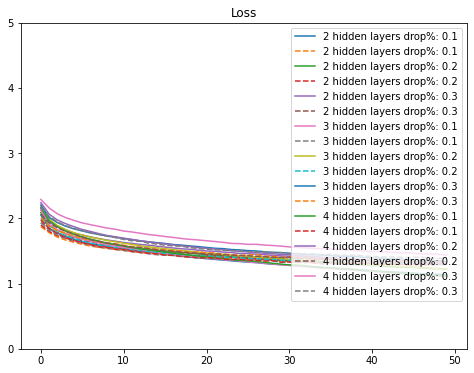

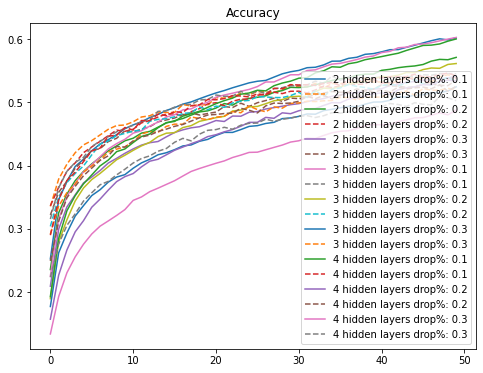

In [21]:

import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond)
plt.title("Loss")
plt.ylim([0, 5])
plt.legend()
plt.show()

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond)
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond)
plt.title("Accuracy")
plt.legend()
plt.show()